In [1]:
! pip install opendatasets

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns


In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: smartking90990
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset


100%|██████████| 38.4M/38.4M [00:03<00:00, 11.0MB/s]


In [4]:

#Base_path to image
DATASET_BASE_DIR = "/content/animal-image-classification-dataset/Animals"

In [5]:
classes = os.listdir(DATASET_BASE_DIR)
print(classes)

['cats', 'snakes', 'dogs']


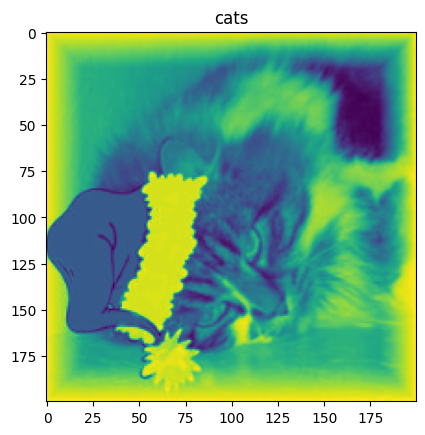

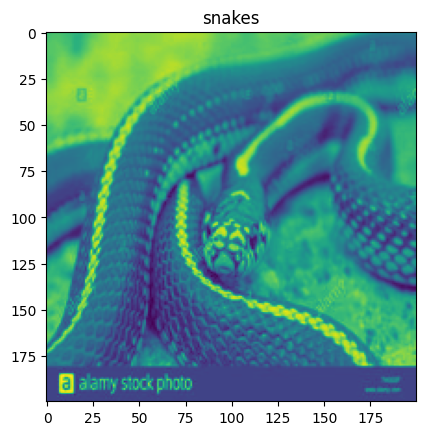

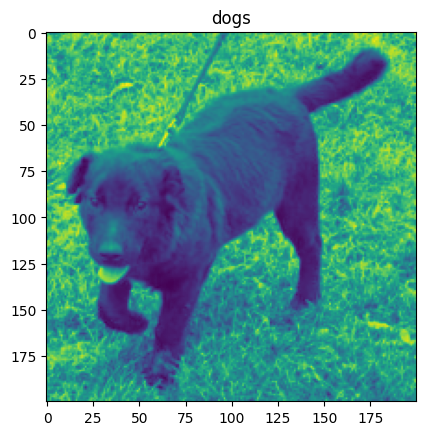

In [6]:
for class_name in classes:
  class_path = os.path.join(DATASET_BASE_DIR,class_name)
  images  = os.listdir(class_path)
  for image in images:
    image_path = os.path.join(class_path,image)
    full_img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    full_img = cv2.resize(full_img,(200,200))
    plt.imshow(full_img)
    plt.title(class_name)
    plt.show()
    break




In [7]:
dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_BASE_DIR,
    shuffle=False

    )




Found 3000 files belonging to 3 classes.


In [8]:
s_dataset = dataset.shuffle(94,seed=42)

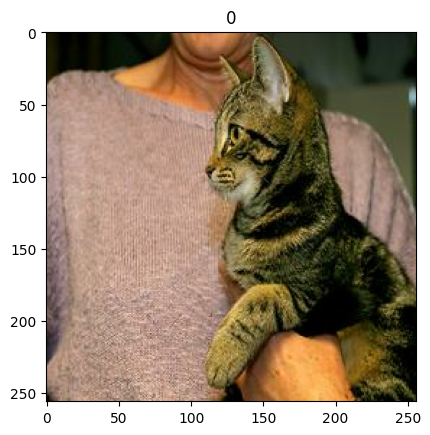

(32,)


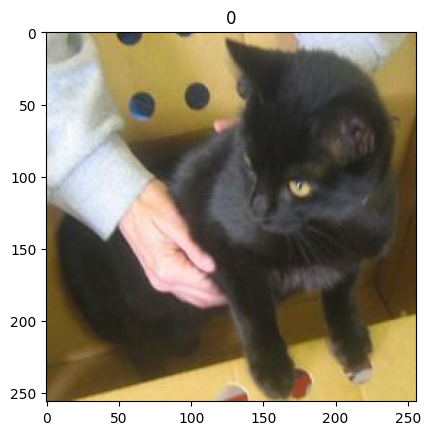

(32,)


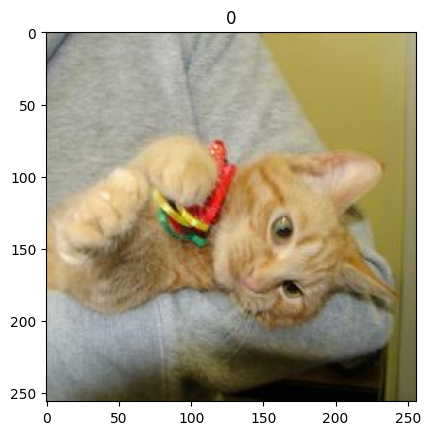

(32,)


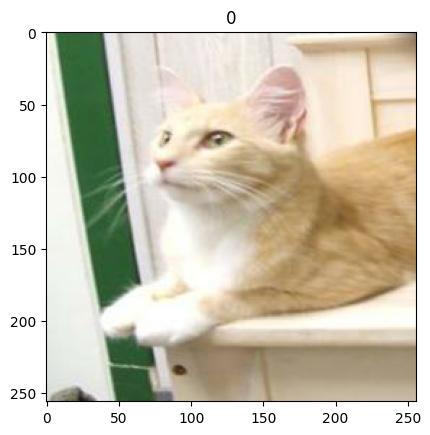

(32,)


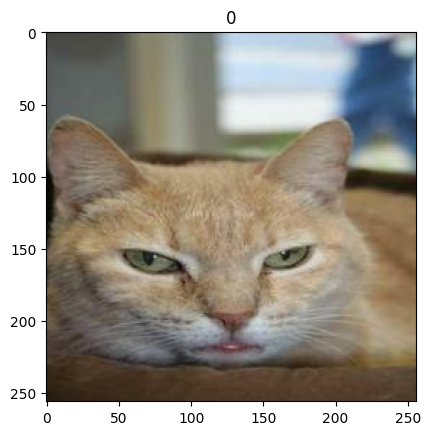

(32,)


In [9]:
for images,labels in dataset.take(5):
  plt.imshow(tf.cast(images[0],tf.int32))
  plt.title(labels[0].numpy())
  plt.show()
  print(labels.shape)




Data Preprocessing

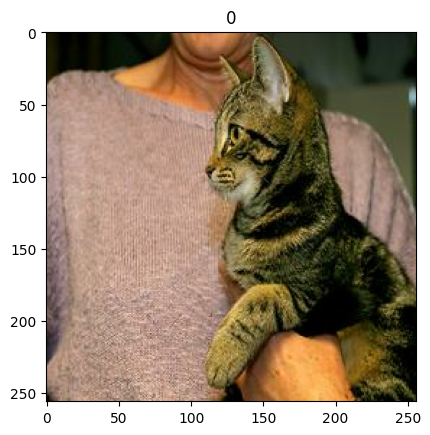

(32,)


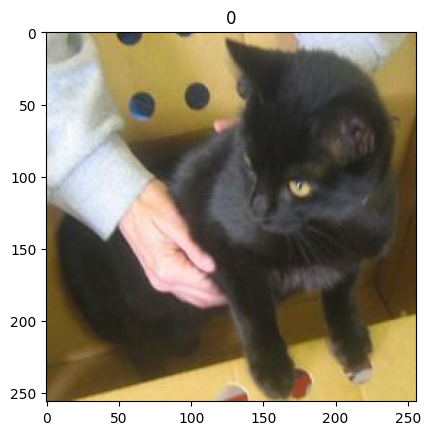

(32,)


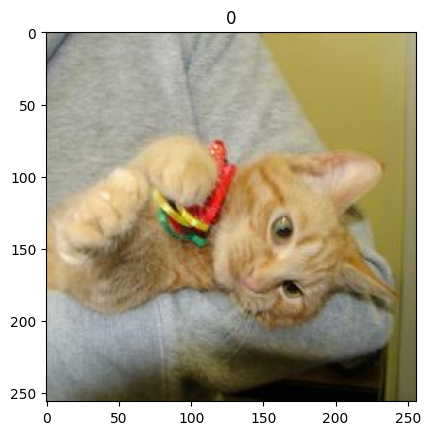

(32,)


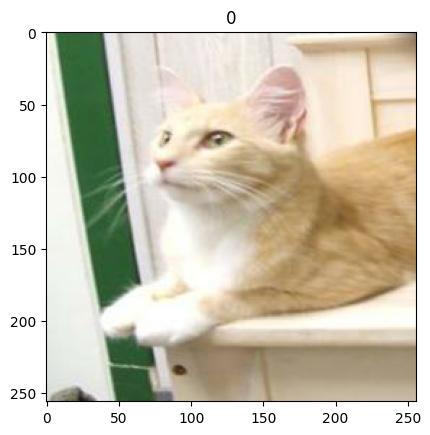

(32,)


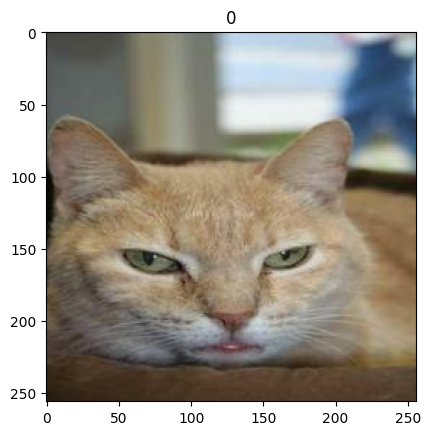

(32,)


In [10]:
for images,labels in dataset.take(5):
  plt.imshow(tf.cast(images[0],tf.int32))
  plt.title(labels[0].numpy())
  plt.show()
  print(labels.shape)

In [11]:
len(dataset)

94

## Data Preprocessing

In [23]:
s_dataset = s_dataset.map(lambda x,y: (x/255,y))

In [24]:
s_dataset = s_dataset.map(lambda x,y:  (x[:,:,:,:1], y))

In [27]:
batch = s_dataset.as_numpy_iterator().next()

In [28]:
batch[0].shape

(32, 256, 256, 1)

### Model_selection

In [16]:
65 + 18 + 9

92

In [17]:
print(int(0.1 * 94))
print((0.1 * 94)
)

9
9.4


In [32]:
len(dataset)

train_size = int(len(dataset) * 0.7) + 1
val_size = int(len(dataset) * 0.2)
test_size = int(len(dataset) * 0.1) + 1

In [33]:
train_dataset = s_dataset.take(train_size)
val_dataset = s_dataset.skip(train_size).take(val_size)
test_datset = s_dataset.skip(train_size + val_size).take(test_size)


## Model Selection

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()
model.add(Conv2D(64,(3,3),1,activation='relu',input_shape=(256,256,1) ))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add( Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),optimizer=tf.optimizers.Adam(),metrics=["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,510,179 (120.20 MB)

 Trainable params: 31,510,179 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(train_dataset,epochs=15,validation_data=val_dataset)

Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.3129 - loss: 1.1340 - val_accuracy: 0.3646 - val_loss: 1.0988
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.2508 - loss: 1.0991 - val_accuracy: 0.4410 - val_loss: 1.0848
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.4238 - loss: 1.1147 - val_accuracy: 0.4718 - val_loss: 0.9887
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.3083 - loss: 1.1517 - val_accuracy: 0.6510 - val_loss: 0.9586
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.4835 - loss: 1.0144 - val_accuracy: 0.4983 - val_loss: 0.9898
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.5988 - loss: 1.0039 - val_accuracy: 0.2465 - val_loss: 1.6749
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.4226 - loss: 1.1851 - val_accuracy: 0.4410 - val_loss: 1.5155
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.5256 - loss: 1.2063 - val_accuracy: 0.69

In [39]:
model.evaluate(test_datset)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9769 - loss: 0.0992


[0.1008913516998291, 0.9750000238418579]

In [40]:
model = Sequential()
model.add(Conv2D(64,(3,3),1,activation='relu',input_shape=(256,256,1) ))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())


model.add( Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),optimizer=tf.optimizers.Adam(),metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,893,859 (30.11 MB)

 Trainable params: 7,893,859 (30.11 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(train_dataset,batch_size=32,epochs=30,validation_data=val_dataset)

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.3311 - loss: 1.3076 - val_accuracy: 0.2658 - val_loss: 1.0725
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.3846 - loss: 1.0929 - val_accuracy: 0.3576 - val_loss: 1.0039
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.4034 - loss: 1.0646 - val_accuracy: 0.4323 - val_loss: 1.0147
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.5617 - loss: 0.9285 - val_accuracy: 0.5139 - val_loss: 1.0383
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.4887 - loss: 1.0748 - val_accuracy: 0.2778 - val_loss: 1.1578
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.3220 - loss: 1.1098 - val_accuracy: 0.4045 - val_loss: 1.0771
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.4084 - loss: 1.0686 - val_accuracy: 0.5903 - val_loss: 0.9035
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.5404 - loss: 0.9638 - val_accuracy: 0.5399

In [42]:
model.evaluate(test_datset)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 1.0000 - loss: 0.0048


[0.0058929817751049995, 1.0]

In [52]:
model_path = "./drive/MyDrive/animal_model.keras"

In [44]:
# model.save("./drive/MyDrive/animal_model.h5")
model.save("./drive/MyDrive/animal_model.keras")

In [53]:
model = tf.keras.models.load_model(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [45]:
test_datset.take(1)


for images,labels in test_datset.take(1):
  print(labels)
  break

tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)


tf.Tensor(1, shape=(), dtype=int32)


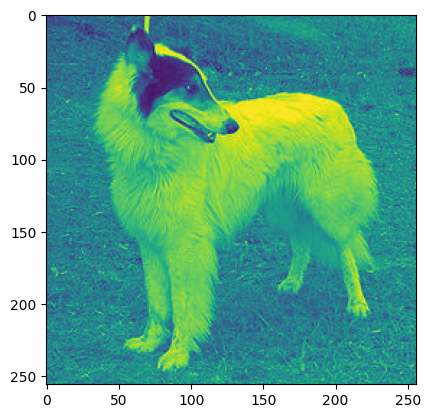

In [46]:
for images,labels in test_datset.take(1):
  plt.imshow(images[0])
  print(labels[0])
  plt.show()
  break

In [47]:
maps_an = ["cat","dog","snake"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
pred snake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
pred snake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
pred dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
pred snake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
pred snake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
pred dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
pred dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
pred snake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
pred cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
pred cat


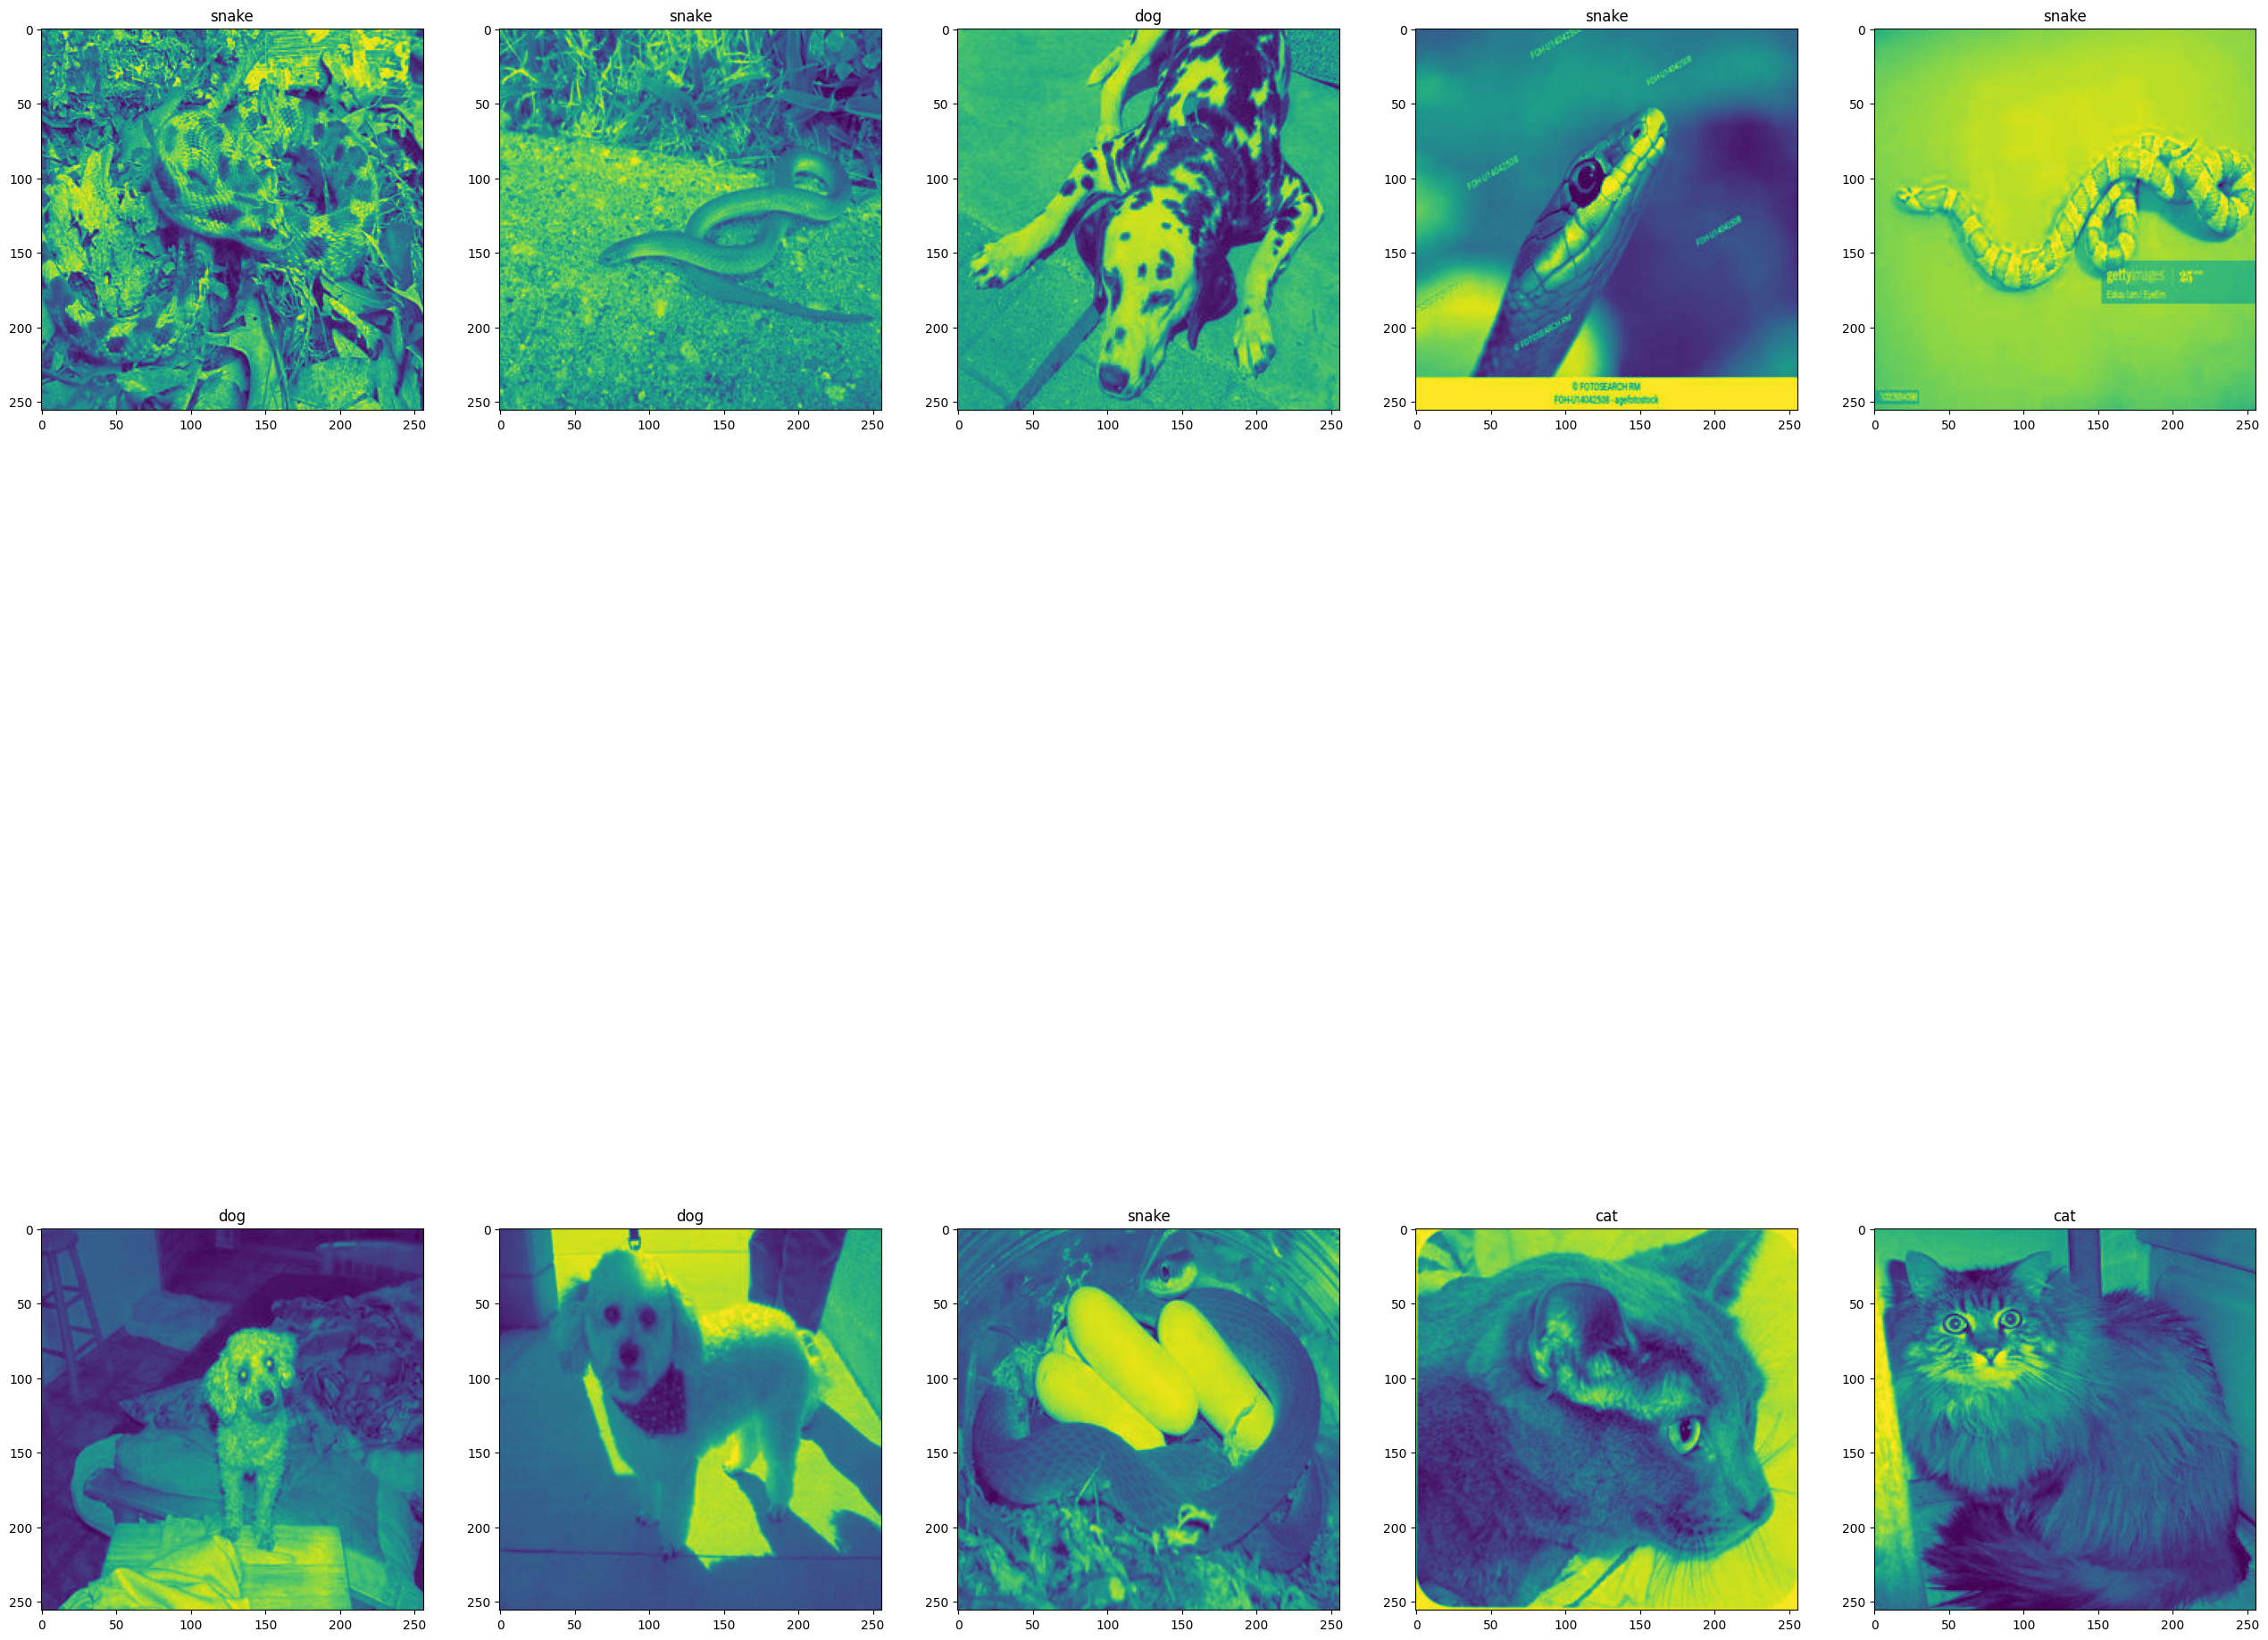

In [85]:
fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(32,32))
ax = ax.flatten()
i=0
for images,labels in test_datset.take(10):
  ff = tf.reshape(images[0],(-1,256,256,1))
  ax[i].imshow(images[0])
  ax[i].set_title(maps_an[labels[0]])
  x  = model.predict(ff)
  print("pred",maps_an[np.argmax(x)])
  i += 1



In [51]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

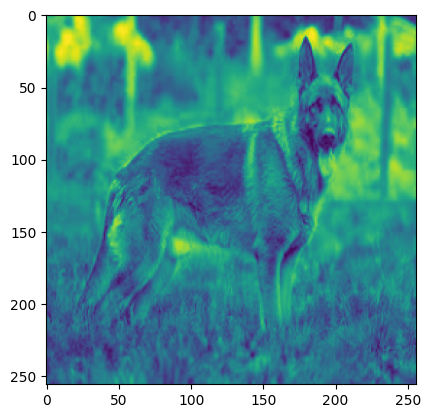

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


'snake'

In [86]:
kk = cv2.imread("images.jpg")
kk = cv2.resize(kk,(256,256))

kk =kk[:,:,:1]

plt.imshow(kk)
plt.show()

kk = tf.reshape(kk,(-1,256,256,1))


kk.shape

maps_an[np.argmax(model.predict(kk))]

In [71]:
def predict_image(img):
    # cv2.imread(img)
    image = cv2.resize(img,(256,256))
    image = image[:,:,:1]
    ff = tf.reshape(image,(-1,256,256,1))
    x  = model.predict(ff)
    return "pred",maps_an[np.argmax(x)]

In [72]:
import gradio as gr


interface =  gr.Interface(fn=predict_image,inputs=gr.Image(),outputs="text")
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d7a25f2e50487ac016.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
